In [1]:

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from notebooks.gem5.utils import create_compare_all

res = create_compare_all()

res

Creating: /home/salabed/workspace/autorocks/local_execution/gem5osdi/aes_aes/20_params/100_iter/compare_all_models_training_time.csv
Creating: /home/salabed/workspace/autorocks/local_execution/gem5osdi/aes_aes/20_params/100_iter/compare_all_models_perf_step.csv
Creating: /home/salabed/workspace/autorocks/local_execution/gem5osdi/aes_aes/20_params/100_iter/compare_all_models_params.csv
Creating: /home/salabed/workspace/autorocks/local_execution/gem5osdi/fft_transpose/20_params/100_iter/compare_all_models_training_time.csv
Creating: /home/salabed/workspace/autorocks/local_execution/gem5osdi/fft_transpose/20_params/100_iter/compare_all_models_perf_step.csv
Creating: /home/salabed/workspace/autorocks/local_execution/gem5osdi/fft_transpose/20_params/100_iter/compare_all_models_params.csv
Creating: /home/salabed/workspace/autorocks/local_execution/gem5osdi/stencil_stencil3d/20_params/100_iter/compare_all_models_training_time.csv
Creating: /home/salabed/workspace/autorocks/local_execution/gem

,model,iteration,bench_stats.edp,task
0,BoGraph,0,-38.144063,aes
1,BoGraph,1,-37.758302,aes
2,BoGraph,2,-36.769004,aes
3,BoGraph,3,-37.629890,aes
4,BoTorch,0,-35.937719,aes
...,...,...,...,...
11,PBTTuner,1,-42.772408,md_knn
12,PBTTuner,2,-43.398176,md_knn
13,Random,0,-43.455829,md_knn
14,Random,1,-42.399803,md_knn


In [3]:
from autorocks.viz import viz

In [5]:
hatches = ["/", "\\", "|", "-", "+", "x", "o", "O", ".", "*"]
models = res.model.unique().tolist()

model_to_hatchet = {}
for i, m in enumerate(models):
    model_to_hatchet[m] = hatches[i]

In [6]:
res_c = res.copy()
for task in res_c["task"].unique():
    res_def = res_c[(res_c["model"] == "Default") & (res_c["task"] == task)]["bench_stats.edp"].mean()
    res_c.loc[(res_c["model"] != "Default") & (res_c["task"] == task), "bench_stats.edp"] -= res_def
res_c.loc[:, "bench_stats.edp"] *= -1
res_c = res_c[res_c["model"] != "Default"]
res_c

,model,iteration,bench_stats.edp,task
0,BoGraph,0,6.218058,aes
1,BoGraph,1,5.832297,aes
2,BoGraph,2,4.842999,aes
3,BoGraph,3,5.703885,aes
4,BoTorch,0,4.011714,aes
...,...,...,...,...
11,PBTTuner,1,4.117526,md_knn
12,PBTTuner,2,4.743294,md_knn
13,Random,0,4.800947,md_knn
14,Random,1,3.744921,md_knn


In [10]:
res_c = res_c[res_c["task"] != "AES"]
res_c

,model,iteration,bench_stats.edp,task
0,BoGraph,0,5.692975,TRANSPOSE
1,BoGraph,1,5.159063,TRANSPOSE
2,BoGraph,2,5.950144,TRANSPOSE
3,BoTorch,0,4.885753,TRANSPOSE
4,BoTorch,1,4.609992,TRANSPOSE
...,...,...,...,...
11,PBTTuner,1,4.117526,KNN
12,PBTTuner,2,4.743294,KNN
13,Random,0,4.800947,KNN
14,Random,1,3.744921,KNN


/tmp/ipykernel_278447/4131331034.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_c['task'] = res_c['task'].apply(lambda x: x.replace('gemm_', "").replace("stencil_", "").replace("aes_", "").replace("fft_", "").replace("spmv_","").replace("md_", "").upper())


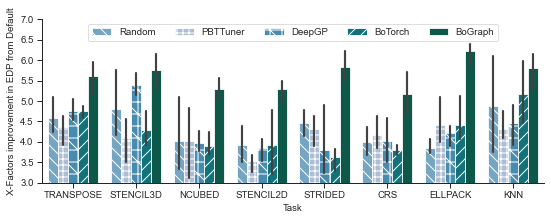

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

save_fig = True
DPI = 600  # default dpi for most printers
plt.style.use("ggplot")
sns.set_theme(style="ticks", rc={"axes.spines.right": False, "axes.spines.top": False})
sns.set_context("paper")  # , font_scale=1.5, rc={"lines.linewidth": 1.5})
plt.rcParams["svg.fonttype"] = "none"
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "Arial"

plt.rc("text", usetex=False)
plt.rc("xtick", labelsize="medium")
plt.rc("ytick", labelsize="medium")
plt.rc("axes", labelsize="medium")
plt.rc("pdf", use14corefonts=True)

fig, ax = plt.subplots(figsize=(9, 3))
res_c["task"] = res_c["task"].apply(
    lambda x: x.replace("gemm_", "")
    .replace("stencil_", "")
    .replace("aes_", "")
    .replace("fft_", "")
    .replace("spmv_", "")
    .replace("md_", "")
    .upper()
)
color_palette = {
    "BoGraph": "#016450",
    "BoTorch": "#02818a",
    "DeepGP": "#3690c0",
    "Default": "#f6eff7",
    "PBTTuner": "#a6bddb",
    "Random": "#67a9cf",
}
ax = sns.barplot(
    data=res_c,
    x="task",
    y="bench_stats.edp",
    hue="model",
    hue_order=["Random", "PBTTuner", "DeepGP", "BoTorch", "BoGraph"],
    palette=color_palette,
    ax=ax,
)
hatches = ["\\\\", "++", "+\\", "//", ""]
# Loop over the bars
for bars, hatch in zip(ax.containers, hatches):
    # Set a different hatch for each group of bars
    for bar in bars:
        bar.set_hatch(hatch)

ax.set(ylabel="X-Factors improvement in EDP from Default", xlabel="Task", ylim=(3, 7))
plt.legend(ncol=len(color_palette), loc="upper center", fontsize="medium")


output_location = "/home/salabed/workspace/latex/papers/eurosys22_workshop/figs"
output_format = "svg"  # pdf
# output_format = "pdf" # pdf
if output_format == "svg":
    output_location = f"{output_location}/svg/"

fig.savefig("res.pdf", bbox_inches="tight")
if save_fig:
    fig.savefig(f"{output_location}/all_perfs.{output_format}", bbox_inches="tight", format=f"{output_format}", dpi=600)

In [21]:
viz.create_color_palette_df(
    res,
    ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"],
)

{'BoGraph': '#9b59b6',
 'BoTorch': '#3498db',
 'DeepGP': '#95a5a6',
 'Default': '#e74c3c',
 'PBTTuner': '#34495e',
 'Random': '#2ecc71'}